In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score,classification_report
import seaborn as sns
import joblib


In [2]:
data = pd.read_csv(r'E:\python projects\Datasets\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.drop('Time',axis=1,inplace=True)

<Axes: >

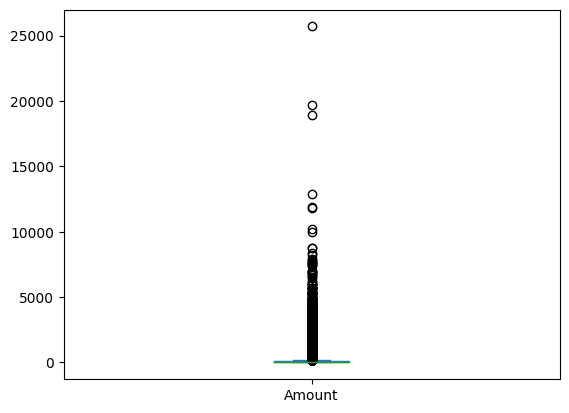

In [6]:
data['Amount'].plot(kind='box')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))


# we ued min max scaler as we can't lose the original data "extreme outliers"

In [8]:
data.duplicated().sum()

np.int64(9144)

In [9]:
data.drop_duplicates(inplace=True)

<Axes: >

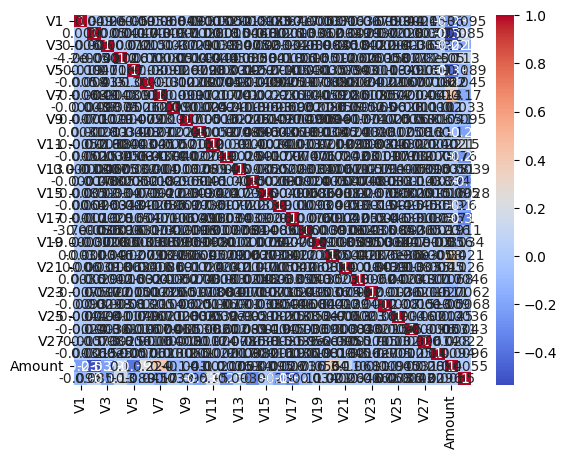

In [22]:
data_corr = data.corr()  # Calculate the correlation matrix for the entire dataset
sns.heatmap(data_corr, annot=True, cmap='coolwarm')  # Plot the heatmap


In [23]:
class_corr = data_corr['Class'].sort_values(ascending=False)
print(class_corr)

Class     1.000000
V11       0.151260
V4        0.130313
V2        0.084754
V19       0.033784
V8        0.033364
V21       0.026239
V27       0.021888
V20       0.021349
V28       0.009642
Amount    0.005451
V22       0.004612
V26       0.004341
V25       0.003593
V15      -0.002824
V13      -0.003934
V23      -0.006206
V24      -0.006831
V6       -0.044777
V5       -0.088642
V9       -0.094583
V1       -0.094718
V18      -0.106447
V7       -0.173292
V3       -0.185772
V16      -0.188222
V10      -0.208104
V12      -0.253150
V14      -0.297550
V17      -0.317202
Name: Class, dtype: float64


In [27]:
valid = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

valid.describe().astype(float)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,...,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.000000,275190.0
mean,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.003523,0.0
std,1.926156,1.653899,1.454690,1.408379,1.356365,1.311099,1.189184,1.169290,1.091353,1.046136,...,0.724692,0.725346,0.628886,0.605677,0.523557,0.484171,0.398191,0.332186,0.009855,0.0
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,-0.938732,-0.615265,-0.836237,-0.864528,-0.698317,-0.764456,-0.549753,-0.209634,-0.657122,-0.536756,...,-0.225122,-0.532182,-0.165223,-0.360887,-0.323599,-0.328355,-0.071749,-0.052638,0.000249,0.0
50%,-0.056188,0.068826,0.203635,-0.037813,-0.059590,-0.269979,0.045892,0.022647,-0.063328,-0.090628,...,-0.026032,0.013352,-0.013600,0.037655,0.009731,-0.056762,0.002493,0.011747,0.000924,0.0
75%,1.295144,0.816240,1.050013,0.748570,0.604707,0.388728,0.584559,0.321160,0.594172,0.472001,...,0.188380,0.534119,0.145377,0.433177,0.346997,0.243939,0.094226,0.081093,0.003110,0.0
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,0.0


In [31]:
valid_stats = valid.describe()

# Calculate differences
diff_25_min = valid_stats.loc['25%'] - valid_stats.loc['min']
diff_max_75 = valid_stats.loc['max'] - valid_stats.loc['75%']
std = valid_stats.loc['std']
# Display the results
print("Differences between 25% and min:")
print(diff_25_min.sort_values(ascending=False))
print("\nDifferences between max and 75%:")
print(diff_max_75.sort_values(ascending=False))
print("\nStandard Deviation:")
print(std.sort_values(ascending=False))

Differences between 25% and min:
V5        113.044990
V8         73.007084
V2         72.100463
V1         55.468778
V20        54.285630
V3         47.489352
V23        44.642512
V21        34.605260
V7         31.215194
V6         25.396050
V27        22.493930
V14        17.969107
V17        16.617245
V28        15.377446
V12        14.734159
V10        14.204340
V22        10.400961
V25         9.971798
V16         9.640551
V19         6.749052
V9          5.633609
V13         5.138066
V18         4.869681
V4          4.818643
V11         4.023608
V15         3.795258
V24         2.475740
V26         2.276196
Amount      0.000249
Class       0.000000
dtype: float64

Differences between max and 75%:
V7        120.004935
V6         72.912897
V20        39.281847
V5         34.196959
V28        33.766715
V27        31.517972
V10        23.273135
V21        22.426510
V23        22.383035
V8         18.388094
V2         18.086213
V16        16.789905
V4         16.126774
V9         15.0

In [32]:
fraud.describe()

fraud_stats = fraud.describe()

# Calculate differences
diff_25_min = fraud_stats.loc['25%'] - fraud_stats.loc['min']
diff_max_75 = fraud_stats.loc['max'] - fraud_stats.loc['75%']
std_fraud = fraud_stats.loc['std']
# Display the results
print("Differences between 25% and min:")
print(diff_25_min.sort_values(ascending=False))
print("\nDifferences between max and 75%:")
print(diff_max_75.sort_values(ascending=False))
print("\nStandard Deviation:")
print(std_fraud.sort_values(ascending=False))

Differences between 25% and min:
V8        40.882743
V7        36.568047
V1        24.948690
V3        23.177178
V21       22.825539
V23       18.912447
V5        17.826549
V10       17.290459
V17       13.574256
V12       10.082066
V14        9.709185
V9         9.637307
V2         9.547535
V22        8.365083
V16        7.660668
V27        7.247931
V18        4.929887
V25        4.461295
V20        3.968022
V6         3.955822
V15        3.860446
V11        3.630796
V4         3.601918
V19        3.380973
V13        2.149730
V28        1.772068
V24        1.591486
V26        0.889593
Amount     0.000039
Class      0.000000
dtype: float64

Differences between max and 75%:
V21       26.010146
V8        18.297792
V2        17.485986
V5        10.834267
V20       10.237600
V17        7.868440
V22        7.745602
V14        7.694888
V6         6.887762
V11        6.794789
V7         6.709726
V10        6.478904
V4         5.823754
V23        5.178571
V3         4.421664
V16        4.28212

In [35]:
# Combine standard deviations of valid and fraud
std_comparison = pd.DataFrame({'Valid Std': std, 'Fraud Std': std_fraud})

# Calculate the differences
std_comparison['Ratio'] = std_comparison['Fraud Std'] / std_comparison['Valid Std']

# Display the result
print(std_comparison.sort_values(by='Ratio', ascending=False))

        Valid Std  Fraud Std     Ratio
V17      0.748191   6.965744  9.310114
V7       1.189184   6.858024  5.766999
V12      0.948156   4.582331  4.832885
V8       1.169290   5.585950  4.777214
V14      0.893000   4.253210  4.762833
V3       1.454690   6.909647  4.749911
V16      0.850653   3.831724  4.504451
V10      1.046136   4.706451  4.498891
V5       1.356365   5.278831  3.891894
V21      0.724692   2.731191  3.768762
V18      0.828909   2.901815  3.500765
V1       1.926156   6.593145  3.422956
V27      0.398191   1.245779  3.128595
V11      1.003609   2.672817  2.663205
V2       1.653899   4.122500  2.492594
V23      0.628886   1.508570  2.398798
V9       1.091353   2.465047  2.258708
V4       1.408379   2.871523  2.038885
V19      0.818293   1.534246  1.874935
V20      0.778613   1.289414  1.656039
V22      0.725346   1.181295  1.628595
V28      0.332186   0.533100  1.604822
V25      0.523557   0.806785  1.540969
V6       1.311099   1.715347  1.308328
V15      0.917535   1.045

In [10]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

# extremly imbalanced data 

In [11]:
x=data.drop('Class',axis=1)
y=data['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

classifier = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}

for name,classifier in classifier.items():
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(f'{name} accuracy score is {accuracy_score(y_test,y_pred)}')
    print(f'{name} classification report is \n{classification_report(y_test,y_pred)}')
    print(f'{name} confusion matrix is \n{confusion_matrix(y_test,y_pred)}')
    print(f'{name} roc auc score is {roc_auc_score(y_test,y_pred)}')

LogisticRegression accuracy score is 0.9992382057932636
LogisticRegression classification report is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.62      0.73        91

    accuracy                           1.00     55133
   macro avg       0.94      0.81      0.86     55133
weighted avg       1.00      1.00      1.00     55133

LogisticRegression confusion matrix is 
[[55035     7]
 [   35    56]]
LogisticRegression roc auc score is 0.807628719886632
DecisionTreeClassifier accuracy score is 0.9989661364337148
DecisionTreeClassifier classification report is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.68      0.71      0.70        91

    accuracy                           1.00     55133
   macro avg       0.84      0.86      0.85     55133
weighted avg       1.00      1.00      1.00     55133

DecisionTre

In [12]:
# oversampling 
x=data.drop('Class',axis=1)
y=data['Class']



from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_res,y_res=smote.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

classifier = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}

for name,classifier in classifier.items():
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(f'{name} accuracy score is {accuracy_score(y_test,y_pred)}')
    print(f'{name} classification report is \n{classification_report(y_test,y_pred)}')
    print(f'{name} confusion matrix is \n{confusion_matrix(y_test,y_pred)}')
    print(f'{name} roc auc score is {roc_auc_score(y_test,y_pred)}')

LogisticRegression accuracy score is 0.9425669537410516
LogisticRegression classification report is 
              precision    recall  f1-score   support

           0       0.92      0.98      0.94     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.94      0.94      0.94    110076
weighted avg       0.94      0.94      0.94    110076

LogisticRegression confusion matrix is 
[[53718  1355]
 [ 4967 50036]]
LogisticRegression roc auc score is 0.9425460634833229
DecisionTreeClassifier accuracy score is 0.9982284966750246
DecisionTreeClassifier classification report is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076

DecisionTr

In [13]:
rf = RandomForestClassifier()
rf.fit(x_res,y_res)

RandomForestClassifier()

In [14]:
import joblib
joblib.dump(rf,"Creadit_Card_model.pk1")

['Creadit_Card_model.pk1']

In [15]:
model = joblib.load("Creadit_Card_model.pk1")

# Test the model "insert values of your choice (Anonymized PCA-transformed) "
prediction = model.predict([[]])

c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by RandomForestClassifier.

In [ ]:
if prediction == 0:
    print("The transaction is normal")
else:
    print("The transaction is fraudulent!!!!")